Вар. 27 (513020125)
1. В результате эксперимента получены данные, приведенные в таблице 1.  
a) Построить вариационный ряд, эмпирическую функцию распределения и гистограмму частот.  
b) Вычислить выборочные аналоги следующих числовых характеристик:  
(i) математического ожидания, (ii) дисперсии, (iii) медианы, (iv) асимметрии, (v) эксцесса,  
(vi) вероятности P(X ∈ [a, b]).  
c) В предположении, что исходные наблюдения являются выборкой из распределения Пуассона, построить оценку  
максимального правдоподобия параметра λ, а также оценку λ по методу моментов. Найти смещение оценок.  
d) Построить асимптотический доверительный интервал уровня значимости α1 для параметра λ на базе оценки  
максимального правдоподобия.  
e) Используя гистограмму частот, построить критерий значимости χ2 проверки простой гипотезы согласия  
с распределением Пуассона с параметром λ0. Проверить гипотезу на уровне значимости α1. Вычислить  
наибольшее значение уровня значимости, на котором еще нет оснований отвергнуть данную гипотезу.  
f) Построить критерий значимости χ2 проверки сложной гипотезы согласия с распределением Пуассона. Проверить  
гипотезу на уровне значимости α1. Вычислить наибольшее значение уровня значимости, на котором еще нет  
оснований отвергнуть данную гипотезу.  
g) Построить наиболее мощный критерий проверки простой гипотезы пуассоновости с параметром λ = λ0 при  
альтернативе пуассоновости с параметром λ = λ1. Проверить гипотезу на уровне значимости α1. Что получится,  
если поменять местами основную и альтернативную гипотезы?  

Таблица 1 α1 = 0.02; a = 0.00; b = 2.49; λ0 = 2.00; λ1 = 4.00.  
0 1 2 0 0 7 1 0 2 1 0 1 2 2 0 0 1 8 0 0 14 4 3 0 0 3 0 6 2 2 1 0 0 2 0 4 0 0 3 3 1 1 0 0 6 8 1  
4 1 1

In [2]:
# Данные
import numpy as np
data = np.array([0, 1, 2, 0, 0, 7, 1, 0, 2, 1, 0, 1, 2, 2, 0, 0, 1, 8, 0, 0, 14, 4, 3, 0, 0, 3, 0, 6, 2, 2, 1, 0, 0,
                 2, 0, 4, 0, 0, 3, 3, 1, 1, 0, 0, 6, 8, 1, 4, 1, 1])
n = len(data)
alpha = 0.02
a = 0.00
b = 2.49
lambda0 = 2.00
lambda1 = 4.00


## Пункт a)

### 1. Вариационный ряд

In [3]:
# Получение уникальных значений и их частот
unique_values, counts = np.unique(data, return_counts=True)

# Форматирование вариационного ряда
variational_series = [f"{value}^({count})" for value, count in zip(unique_values, counts)]
print("Вариационный ряд:", ", ".join(variational_series))
sorted_data = np.sort(data)
print(sorted_data)

Вариационный ряд: 0^(19), 1^(11), 2^(7), 3^(4), 4^(3), 6^(2), 7^(1), 8^(2), 14^(1)
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1
  1  1  1  1  1  1  2  2  2  2  2  2  2  3  3  3  3  4  4  4  6  6  7  8
  8 14]


### 2. Эмпирическая функция распределения (ЭФР)
$$
\hat{F}_n(x) = \frac{1}{n} \sum_{i=1}^{n} \text{\textbf{1}}_{\{X_i \leq x\}},
$$
где $n$ — объем выборки.

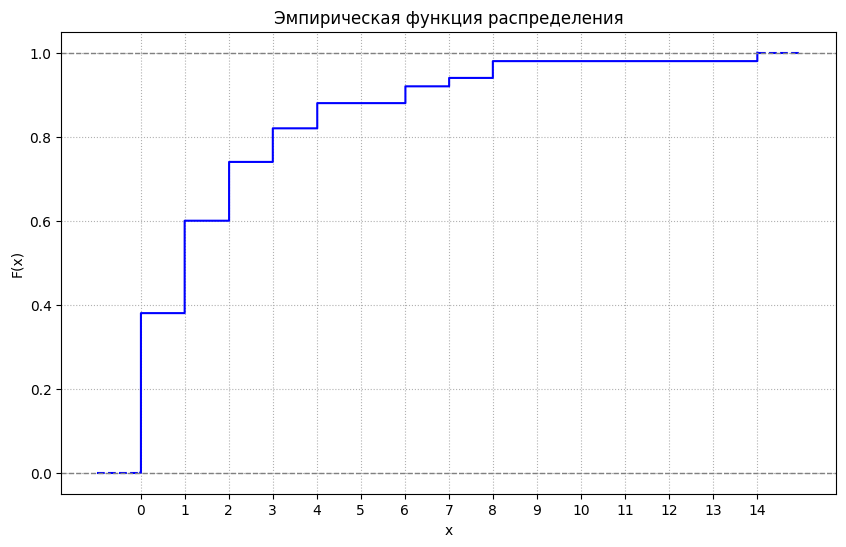

In [4]:
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF

ecdf = ECDF(data)
x = np.linspace(min(data) - 1, max(data) + 1, 1000)
y = ecdf(x)

# Находим точки, где F(x) переходит от 0 к основному росту и от роста к 1
x_left = x[y == 0][-1]  # Последняя точка, где F(x)=0
x_right = x[y == 1][0]  # Первая точка, где F(x)=1

# Разделяем данные на 3 части
mask_left = (x < x_left)       # F(x) = 0
mask_mid = (x >= x_left) & (x <= x_right)  # Основной рост
mask_right = (x > x_right)     # F(x) = 1

# Рисуем каждую часть своим стилем
plt.figure(figsize=(10, 6))
plt.step(x[mask_left], y[mask_left], '--', color='blue', where='post', label='F(x)=0')  # Пунктир слева
plt.step(x[mask_mid], y[mask_mid], '-', color='blue', where='post', label='ЭФР')        # Сплошная основная часть
plt.step(x[mask_right], y[mask_right], '--', color='blue', where='post', label='F(x)=1') # Пунктир справа

# Настройки графика
plt.title("Эмпирическая функция распределения")
plt.xlabel("x")
plt.ylabel("F(x)")
# Добавление пунктирных линий для F(x) = 0 и F(x) = 1
plt.axhline(y=0, color='gray', linestyle='--', linewidth=1, label='F(x) = 0')
plt.axhline(y=1, color='gray', linestyle='--', linewidth=1, label='F(x) = 1')

plt.grid(True, linestyle=':')
plt.xticks(np.arange(np.floor(min(data)), np.ceil(max(data)) + 1))
plt.show()

### 3. Гистограмма частот

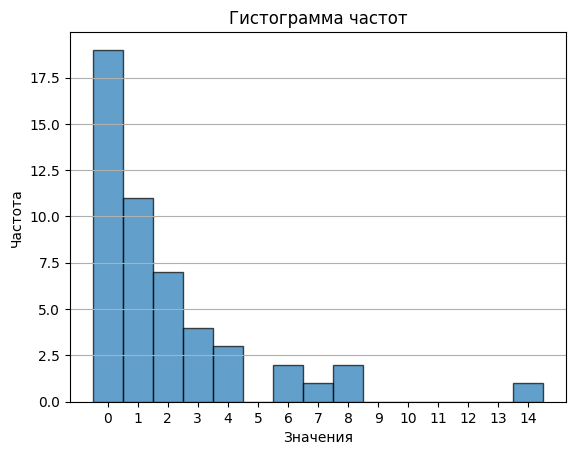

In [5]:
plt.hist(data, bins=np.arange(min(data)-0.5, max(data)+1.5, 1), edgecolor='black', alpha=0.7)
plt.title("Гистограмма частот")
plt.xlabel("Значения")
plt.ylabel("Частота")
plt.xticks(np.arange(min(data), max(data)+1))
plt.grid(axis='y')
plt.show()

## Пункт b)

### (i) Выборочное среднее (математическое ожидание)
Выборочное среднее — оценка теоретического математического ожидания.
$$
\bar{X} = \frac{1}{n} \sum_{i=1}^{n} X_i.
$$

In [6]:
import numpy as np
mean = np.mean(data)
print(f"Выборочное среднее: {mean:.2f}")

Выборочное среднее: 1.96


### (ii) Выборочная дисперсия
Несмещённая оценка дисперсии:
$$
s^2 = \frac{1}{n-1} \sum_{i=1}^{n}(X_i-\bar{X})^2.
$$

Смещенная оценка дисперсии:
$$
s^2_{\text{смещенная}} = \frac{1}{n} \sum_{i=1}^{n}(X_i - \bar{X})^2
$$

где:
- $ n $ — общее количество наблюдений,
- $X_i$ — каждое отдельное наблюдение,
- $\bar{X}$ — среднее значение выборки.

In [4]:
variance = np.var(data, ddof=1)
print(f"Несмещённая оценка дисперсии: {variance:.2f}")
print(f"Смещённая оценка дисперсии: {(np.var(data, ddof=0)):.2f}")
# print(sum((x - mean) ** 2 for x in data) / (n - 1))

Несмещённая оценка дисперсии: 7.67
Смещённая оценка дисперсии: 7.52


### (iii) Медиана
Значение, разделяющее выборку на две равные части.

In [8]:
median = np.median(data)
print(f"Медиана: {median}")

Медиана: 1.0


### (iv) Ассиметрия
$$
Skewness = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X})^3}{s^3}.
$$

In [9]:
from scipy.stats import skew
skewness = skew(data)
print(f"Асимметрия: {skewness:.2f}")

Асимметрия: 2.25


### (v) Эксцесс
$$
Kurtosis = \frac{\frac{1}{n}\sum_{i=1}^{n}(X_i-\bar{X})^4}{s^4} - 3.
$$

In [10]:
from scipy.stats import kurtosis
excess_kurtosis = kurtosis(data)
print(f"Эксцесс: {excess_kurtosis:.2f}")

Эксцесс: 5.92


### (vi) Вероятность $P(X \in [0.00, 2.49])$
$$
P(X \in [a, b]) = \frac{\text{число элементов выборки} \in [a, b]}{n}.
$$

In [11]:
count = np.sum((data >= a) & (data <= b))
probability = count / len(data)
print(f"P(X ∈ [{a}, {b}]): {probability:.2f}")

P(X ∈ [0.0, 2.49]): 0.74


## Пункт c)

### 1. Оценка максимального правдоподобия (ОМП)

Функция правдоподобия для Пуассона:
$$
L(λ) = \prod_{i=1}^{n}\frac{λ^{X_i}e^{-λ}}{X_i!}.
$$

Логарифмируя, получаем:

$$
\ln L(\lambda) = \sum_{i=1}^{n} \left( X_i \ln \lambda - \lambda - \ln X_i! \right).
$$

Дифференцируя по $\lambda$, приравнивая к нулю:

$$
\frac{d}{d\lambda} \ln L(\lambda) = \frac{1}{\lambda} \sum_{i=1}^{n} X_i - n = 0 
\Longrightarrow \hat{\lambda}_{\text{ОМП}} = \frac{1}{n} \sum_{i=1}^{n} X_i = \bar{X}.
$$


In [12]:
lambda_ml = np.mean(data)
print(f"ОМП для λ: {lambda_ml:.2f}")

ОМП для λ: 1.96



**Смещение ОМП:**  
В случае распределения Пуассона оценка максимального правдоподобия (ОМП) параметра $\lambda$ совпадает с выборочным средним:

$$
\hat{\lambda}_{\text{ОМП}} = \bar{x} = \frac{1}{n} \sum_{i=1}^{n} x_i.
$$

Найдём математическое ожидание этой оценки:

$$
\mathbb{E}[\hat{\lambda}_{\text{ОМП}}] = \mathbb{E} \left[ \frac{1}{n} \sum_{i=1}^{n} x_i \right] = \frac{1}{n} \sum_{i=1}^{n} \mathbb{E}[x_i].
$$

Так как для распределения Пуассона $\mathbb{E}[x_i] = \lambda$, то:

$$
\mathbb{E}[\hat{\lambda}_{\text{ОМП}}] = \frac{1}{n} \cdot n \lambda = \lambda.
$$

Отсюда следует:

$$
\text{Смещение}(\hat{\lambda}_{\text{ОМП}}) = \lambda - \lambda = 0.
$$


### 2. Оценка по методу моментов (ОММ)
Приравниваем теоретическое математическое ожидание к выборочному:
$$
E[X]=λ \Longrightarrow \hat{λ}_{\text{MM}} = \bar{X}. \
$$

In [13]:
lambda_mm = np.mean(data)
print(f"ОММ для λ: {lambda_mm:.2f}")

ОММ для λ: 1.96



**Смещение ОММ:**  
Метод моментов приводит к той же оценке:

$$
\hat{\lambda}_{\text{ММ}} = \bar{x}.
$$

Математическое ожидание:

$$
\mathbb{E}[\hat{\lambda}_{\text{ММ}}] = \lambda \
$$

Смещение этой оценки:

$$
\text{Смещение}(\hat{\lambda}_{\text{ММ}}) = \lambda - \lambda = 0.
$$

Таким образом, обе оценки ($\hat{\lambda}_{\text{ОМП}}$ и $\hat{\lambda}_{\text{ММ}}$) являются несмещёнными.


# d) Aсимптотический доверительный интервал уровня значимости α1=0.02 для параметра λ на базе оценки максимального правдоподобия

## Шаги построения

### 1. Оценка $\hat{\lambda}$
ОМП параметра $\lambda$ равна выборочному среднему:
$$ \hat{\lambda} = \bar{x} $$

### 2. Стандартная ошибка
Для распределения Пуассона дисперсия равна $\lambda$:
$$ SE = \sqrt{\frac{\hat{\lambda}}{n}} $$

### 3. Квантиль нормального распределения
Для уровня значимости $\alpha_{1} = 0.02$:
$$ z_{1-\alpha/2} = z_{0.99} $$

### 4. Границы интервала
$$ \hat{\lambda} \pm z_{0.99} \cdot SE $$



In [16]:
import numpy as np
from scipy.stats import norm

z = norm.ppf(1 - alpha/2)
se = np.sqrt(lambda_ml / len(data))
lower = lambda_ml - z * se
upper = lambda_ml + z * se

print(f"z = {z:.3f}")
print(f"se = {se:.3f}")
print(f"Доверительный интервал (98%): ({lower:.3f}, {upper:.3f})")



z = 2.326
se = 0.198
Доверительный интервал (98%): (1.499, 2.421)


## Пункт e) Критерий $\chi^2$ для проверки гипотезы согласия с распределением Пуассона ($λ0 = 2.00$)
Критерий $\chi^2$ проверяет, насколько эмпирические частоты $O_i$ соответствуют теоретическим частотам $E_i$ при заданном распределении.

1. **Расчёт наблюдаемых и теоретических частот:**  
    $O_i$ - наблюдаемые частоты для каждого интервала,

    $$
    E_i = n \cdot P(X = k\ |\ λ = λ_0),
    $$
    где $P(X=k)$ — вероятность по распределению Пуассона.

2. **Группировка данных:** Объединить значения так, чтобы $E_i \geq 5$.

3. **Статистика $\chi^2$:**
    $$
    \chi^2 = \sum_{i=1}^{k}\frac{(O_i - E_i)^2}{E_i}.
    $$
4. **Степени свободы:**
    $$
    df = k - 1 - m,
    $$
    где $k$ — число категорий, $m=0$.  

**Критическое значение:** Сравнение с $χ_{\text{крит}}^2(df, α)$.  
**p-значение:** Вероятность $P(χ^2 \geq χ_{\text{набл}}^2$).

In [17]:
import pandas as pd
from scipy.stats import poisson, chi2

# Теоретические вероятности для каждого k
probs_individual = [poisson.pmf(k, lambda0) for k in unique_values]

# Теоретические частоты
expected_individual = np.array(probs_individual) * n

df_individual = pd.DataFrame({
    "Значение k": unique_values,
    "Наблюдаемая частота (O_i)": counts,
    "Теоретическая вероятность (P(X=k))": np.round(probs_individual, 4),
    "Теоретическая частота (E_i)": np.round(expected_individual, 3)
})

print("Таблица до группировки категорий:")
print(df_individual)



Таблица до группировки категорий:
   Значение k  Наблюдаемая частота (O_i)  Теоретическая вероятность (P(X=k))  \
0           0                         19                              0.1353   
1           1                         11                              0.2707   
2           2                          7                              0.2707   
3           3                          4                              0.1804   
4           4                          3                              0.0902   
5           6                          2                              0.0120   
6           7                          1                              0.0034   
7           8                          2                              0.0009   
8          14                          1                              0.0000   

   Теоретическая частота (E_i)  
0                        6.767  
1                       13.534  
2                       13.534  
3                        9.022  


### Интерпретация
- **Наблюдаемые частоты** $O_i$ — количество раз, когда значение $k$ встречается в выборке.
- **Теоретическая вероятность** $P(X=k)$ — вероятность по распределению Пуассона с $λ=2.0$.
- **Теоретическая частота** $E_i$ — ожидаемое количество значений $k$ при условии, что данные следуют распределению Пуассона ($E_i = n \cdot P(X = k)$).

После группировки категорий (чтобы $E_i ≥ 5$) таблица принимает вид:

In [33]:
from scipy.stats import chi2
# Группировка категорий (для E_i ≥ 5)
groups = [
    [0],    # Группа 1: k=0
    [1],          # Группа 2: k=1
    [2],          # Группа 3: k=2
    [3],          # Группа 4: k=3
    [4, 5, 6, 7, 8]     # Группа 5: k=4,5,6,7,8
]

# Расчёт наблюдаемых частот по группам
# observed_grouped = np.array([19, 11, 7, 4, 3+2+1+2+1])  # ??
observed_grouped = np.array([np.sum(data==k) for k in [0,1,2,3]] + [np.sum(data>=4)])

# Расчёт теоретических вероятностей по группам
probs_grouped = [
    poisson.pmf(0, lambda0),
    poisson.pmf(1, lambda0),
    poisson.pmf(2, lambda0),
    poisson.pmf(3, lambda0),
    1 - poisson.cdf(3, lambda0)  # sum(poisson.pmf(k, lambda0) for k in groups[4])
]

# Теоретические частоты
expected_grouped = np.array(probs_grouped) * n

# Создание таблицы после группировки
df_grouped = pd.DataFrame({
    "Группа": ["0", "1", "2", "3", "4,5,6,7,8"],
    "Наблюдаемая частота (O_i)": observed_grouped,
    "Теоретическая вероятность": np.round(probs_grouped, 4),
    "Теоретическая частота (E_i)": np.round(expected_grouped, 3)
})

print("\nТаблица после группировки категорий:")
print(df_grouped)

# Статистика χ²
chi2_stat = np.sum((observed_grouped - expected_grouped)**2 / expected_grouped)

# Степени свободы
df = 5 - 1 - 0  # 4

# Критическое значение и p-значение
chi2_crit = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"\nχ² наблюдаемое: {chi2_stat:.3f}")
print(f"Критическое значение (α=0.02): {chi2_crit:.3f}")
print(f"p-значение: {p_value:.7f}")

if chi2_stat > chi2_crit:
    print("Отвергаем гипотезу на уровне 0.02")
else:
    print("Нет оснований отвергнуть гипотезу на уровне 0.02")
print(f"""Наибольший уровень значимости, на котором ещё нет оснований отвергнуть гипотезу: {p_value:.7f}
Это означает, что гипотеза отвергается на любом уровне значимости α ≥ {p_value:.7f}""")

# observed = np.array([np.sum(data==k) for k in [0,1,2,3]] + [np.sum(data>=4)])
# expected = np.array([poisson.pmf(k,2)*n for k in [0,1,2,3]] + [n*(1 - poisson.cdf(3,2))])
# chi2_stat = np.sum((observed - expected)**2 / expected)
# df = 4
# crit = chi2.ppf(1-0.02, df)
# p_val = 1 - chi2.cdf(chi2_stat, df)
# print(f"\ne) χ²: {chi2_stat:.2f}, крит: {crit:.2f}, p-value: {p_val:.4f}")





Таблица после группировки категорий:
      Группа  Наблюдаемая частота (O_i)  Теоретическая вероятность  \
0          0                         19                     0.1353   
1          1                         11                     0.2707   
2          2                          7                     0.2707   
3          3                          4                     0.1804   
4  4,5,6,7,8                          9                     0.1429   

   Теоретическая частота (E_i)  
0                        6.767  
1                       13.534  
2                       13.534  
3                        9.022  
4                        7.144  

χ² наблюдаемое: 29.022
Критическое значение (α=0.02): 11.668
p-значение: 0.0000077
Отвергаем гипотезу на уровне 0.02
Наибольший уровень значимости, на котором ещё нет оснований отвергнуть гипотезу: 0.0000077
Это означает, что гипотеза отвергается на любом уровне значимости α ≥ 0.0000077


In [37]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, chi2

# Пусть заданы:
# counts — частоты
# unique_values — уникальные значения
# n — общее число наблюдений
# lambda0 — параметр Пуассона
# alpha — уровень значимости - вычислить его

# Группы значений
groups = [
    [0],    # Группа 1
    [1],          # Группа 2
    [2],          # Группа 3
    [3],          # Группа 4
    [4, 5, 6, 7, 8]     # Группа 5
]

observed_grouped = np.array([np.sum(data==k) for k in [0,1,2,3]] + [np.sum(data>=4)])
probs_grouped = [
    poisson.pmf(0, lambda0),
    poisson.pmf(1, lambda0),
    poisson.pmf(2, lambda0),
    poisson.pmf(3, lambda0),
    1 - poisson.cdf(3, lambda0)  # sum(poisson.pmf(k, lambda0) for k in groups[4])
]

# Теоретические частоты
expected_grouped = np.array(probs_grouped) * n
lower_bounds = []
upper_bounds = []

for i, group in enumerate(groups):
    # obs = sum(counts[np.where(unique_values == k)[0][0]] for k in group if k in unique_values)
    # prob = sum(poisson.pmf(k, lambda0) for k in group)
    # exp = prob * n
    # observed_grouped.append(obs)
    # expected_grouped.append(exp)

    # Нижняя и верхняя границы
    lower = -np.inf if i == 0 else min(group)
    upper = np.inf if i == len(groups) - 1 else max(group)
    lower_bounds.append(lower)
    upper_bounds.append(upper)

# Разности и вклад в статистику
diff = np.array(observed_grouped) - np.array(expected_grouped)
chi2_terms = diff**2 / expected_grouped

# Таблица
df_final = pd.DataFrame({
    "Group": [", ".join(map(str, g)) for g in groups],
    "Lower": lower_bounds,
    "Upper": upper_bounds,
    "O_i": observed_grouped,
    "P_i": np.round(np.array(expected_grouped) / n, 4),
    "E_i": np.round(expected_grouped, 3),
    "O_i - E_i": np.round(diff, 3),
    "(O_i - E_i)^2 / E_i": np.round(chi2_terms, 4)
})

print(df_final)

# Хи-квадрат статистика и p-value
chi2_stat = np.sum(chi2_terms)
df = len(groups) - 1  # без оценки параметров — простая гипотеза
chi2_crit = chi2.ppf(1 - alpha, df)
p_value = 1 - chi2.cdf(chi2_stat, df)

print(f"\nχ² наблюдаемое: {chi2_stat:.3f}")
print(f"Критическое значение (α={alpha:.2f}): {chi2_crit:.3f}")
print(f"p-значение: {p_value:.7f}")
print("Отвергаем H₀" if chi2_stat > chi2_crit else "Нет оснований отвергнуть H₀")


           Group  Lower  Upper  O_i     P_i     E_i  O_i - E_i  \
0              0   -inf    0.0   19  0.1353   6.767     12.233   
1              1    1.0    1.0   11  0.2707  13.534     -2.534   
2              2    2.0    2.0    7  0.2707  13.534     -6.534   
3              3    3.0    3.0    4  0.1804   9.022     -5.022   
4  4, 5, 6, 7, 8    4.0    inf    9  0.1429   7.144      1.856   

   (O_i - E_i)^2 / E_i  
0              22.1157  
1               0.4743  
2               3.1542  
3               2.7957  
4               0.4823  

χ² наблюдаемое: 29.022
Критическое значение (α=0.02): 11.668
p-значение: 0.0000077
Отвергаем H₀


## Пункт f) Критерий $χ^2$ для проверки сложной гипотезы согласия с распределением Пуассона

**Оценка параметра $\lambda$**  
Если параметр $\lambda$ неизвестен, его оценивают по выборке (например, через выборочное среднее):    

$$
\hat{\lambda} = \frac{1}{n} \sum_{i=1}^n x_i,
$$

где $x_i$ — значения выборки, $n$ — объем выборки.

**Степени свободы**  
Число степеней свободы для критерия хи-квадрат:  

$$
df = k - 1 - m,
$$

где:  
- \( k \) — количество интервалов,  
- \( m \) — количество оцененных параметров (в данном случае \( m = 1 \), так как оценивается $\lambda$).

**Критическое значение:** Сравнение с $χ_{\text{крит}}^2(df, α)$.  
**p-значение:** Вероятность $P(χ^2 \geq χ_{\text{набл}}^2$).


In [62]:
import pandas as pd
from scipy.stats import poisson

# Теоретические вероятности для каждого k
probs_individual = [poisson.pmf(k, mean) for k in unique_values]

# Теоретические частоты
expected_individual = np.array(probs_individual) * n

df_individual = pd.DataFrame({
    "Значение k": unique_values,
    "Наблюдаемая частота (O_i)": counts,
    "Теоретическая вероятность (P(X=k))": np.round(probs_individual, 4),
    "Теоретическая частота (E_i)": np.round(expected_individual, 3)
})

print("Таблица до группировки категорий:")
print(df_individual)

Таблица до группировки категорий:
   Значение k  Наблюдаемая частота (O_i)  Теоретическая вероятность (P(X=k))  \
0           0                         19                              0.1409   
1           1                         11                              0.2761   
2           2                          7                              0.2706   
3           3                          4                              0.1768   
4           4                          3                              0.0866   
5           6                          2                              0.0111   
6           7                          1                              0.0031   
7           8                          2                              0.0008   
8          14                          1                              0.0000   

   Теоретическая частота (E_i)  
0                        7.043  
1                       13.804  
2                       13.528  
3                        8.838  


In [ ]:
# from scipy.stats import chi2
# # Группировка категорий (для E_i ≥ 5)
# groups = [
#     [0],    # Группа 1: k=0,1,2
#     [1],          # Группа 2: k=3
#     [2],          # Группа 3: k=4
#     [3],          # Группа 4: k=5
#     [4, 5, 6, 7, 8]     # Группа 5: k=6,8,9
# ]

# # Расчёт наблюдаемых частот по группам
# # observed_grouped = np.array([np.sum(data==k) for k in [0,1,2,3]] + [np.sum(data>=4)])
# probs_grouped = [
#     poisson.pmf(0, lambda0),
#     poisson.pmf(1, lambda0),
#     poisson.pmf(2, lambda0),
#     poisson.pmf(3, lambda0),
#     1 - poisson.cdf(3, lambda0)  # sum(poisson.pmf(k, lambda0) for k in groups[4])
# ]

# # Расчёт теоретических вероятностей по группам
# probs_grouped = [
#     poisson.pmf(3, mean),
#     poisson.pmf(3, mean),
#     poisson.pmf(4, mean),
#     poisson.pmf(5, mean),
#     sum(poisson.pmf(k, mean) for k in groups[4])
# ]

# # Теоретические частоты
# expected_grouped = np.array(probs_grouped) * n

# # Создание таблицы после группировки
# df_grouped = pd.DataFrame({
#     "Группа": ["0,1,2", "3", "4", "5", "6,8,9"],
#     "Наблюдаемая частота (O_i)": observed_grouped,
#     "Теоретическая вероятность": np.round(probs_grouped, 4),
#     "Теоретическая частота (E_i)": np.round(expected_grouped, 3)
# })

# print("\nТаблица после группировки категорий:")
# print(df_grouped)

# # Статистика χ²
# chi2_stat = np.sum((observed_grouped - expected_grouped)**2 / expected_grouped)

# # Степени свободы
# df = 5 - 1 - 1  # 3

# # Критическое значение и p-значение
# chi2_crit = chi2.ppf(1 - alpha, df)
# p_value = 1 - chi2.cdf(chi2_stat, df)

# print(f"\nχ² наблюдаемое: {chi2_stat:.3f}")
# print(f"Критическое значение (α=0.10): {chi2_crit:.3f}")
# print(f"p-значение: {p_value:.3f}")

# if chi2_stat > chi2_crit:
#     print("Отвергаем гипотезу на уровне 0.10")
# else:
#     print("Нет оснований отвергнуть гипотезу на уровне 0.10")

# lambda_hat = np.mean(data)
# expected = np.array([poisson.pmf(k,lambda_hat)*n for k in [0,1,2,3]] + [n*(1 - poisson.cdf(3,lambda_hat))])
# chi2_stat = np.sum((observed - expected)**2 / expected)
# df = 3
# crit = chi2.ppf(1-0.02, df)
# p_val = 1 - chi2.cdf(chi2_stat, df)
# print(f"\nf) χ²: {chi2_stat:.2f}, крит: {crit:.2f}, p-value: {p_val:.4f}")

In [75]:
# import numpy as np
# from scipy.stats import poisson, chi2
# groups = [
#     [0],    # Группа 1: k=0,1,2
#     [1],          # Группа 2: k=3
#     [2],          # Группа 3: k=4
#     [3],          # Группа 4: k=5
#     [4, 5, 6, 7, 8]     # Группа 5: k=6,8,9
# ]

# # Оценка параметра λ
# lambda_hat = np.mean(data)
# print(f"Оценка λ: {lambda_hat:.4f}")

# # Разбиение на интервалы (пример)
# intervals = [
#     (-np.inf, 0),
#     (1, 1),
#     (2, 2),
#     (3, 3),
#     (4, np.inf)
# ]

# # Наблюдаемые частоты
# observed = [19, 11, 7, 4, 9]  # Пример из таблицы

# # Ожидаемые частоты для λ0
# expected = []
# n = len(data)
# for interval in intervals:
#     if interval[0] == -np.inf:
#         prob = poisson.cdf(0, lambda0)
#     elif interval[1] == np.inf:
#         prob = 1 - poisson.cdf(interval[0] - 1, lambda0)
#     else:
#         prob = poisson.pmf(interval[0], lambda0)
#     expected.append(n * prob)

# # Статистика хи-квадрат
# chi2_stat = sum((o - e)**2 / e for o, e in zip(observed, expected))
# print(f"Наблюдаемое χ²: {chi2_stat:.4f}")

# # Степени свободы
# k = len(intervals)
# m = 1  # Оценен один параметр
# df = k - 1 - m
# print(f"Степени свободы: {df}")

# # Критическое значение и p-значение
# chi2_crit = chi2.ppf(1 - alpha, df)
# p_value = 1 - chi2.cdf(chi2_stat, df)
# print(f"Критическое значение: {chi2_crit:.4f}")
# print(f"p-значение: {p_value:.4f}")

# # Вывод решения
# if chi2_stat > chi2_crit:
#     print("Отвергаем H₀")
# else:
#     print("Не отвергаем H₀")

# # Обновим expected_grouped, чтобы быть уверенными, что это numpy-массив
# expected_grouped = np.array(expected_grouped)

# # Вычислим границы для групп
# lower_bounds = [float('-inf')] + [min(g) for g in groups[1:]]
# upper_bounds = [max(g) for g in groups[:-1]] + [float('inf')]

# # Вычислим разности и хи-квадрат члены
# diff = np.array(observed_grouped) - expected_grouped
# chi2_terms = diff**2 / expected_grouped

# # Построим финальную таблицу
# df_final = pd.DataFrame({
#     "Group": [", ".join(map(str, g)) for g in groups],
#     "Lower": lower_bounds,
#     "Upper": upper_bounds,
#     "O_i": observed_grouped,
#     "P_i": np.round(expected_grouped / n, 4),
#     "E_i": np.round(expected_grouped, 3),
#     "O_i - E_i": np.round(diff, 3),
#     "(O_i - E_i)^2 / E_i": np.round(chi2_terms, 4)
# })

# print("\nПодробная таблица для χ² при сложной гипотезе:")
# print(df_final)


In [74]:
# import numpy as np
# from scipy.stats import poisson, chi2


# # Оценка параметра λ
# lambda_hat = np.mean(data)
# print(f"Оценка λ: {lambda_hat:.4f}")

# # Разбиение на интервалы (пример)
# intervals = [
#     (-np.inf, 0),
#     (1, 1),
#     (2, 2),
#     (3, 3),
#     (4, np.inf)
# ]

# # Наблюдаемые частоты
# observed = [19, 11, 7, 4, 9]  # Пример из таблицы

# # Ожидаемые частоты для λ0
# expected = []
# n = len(data)
# for interval in intervals:
#     if interval[0] == -np.inf:
#         prob = poisson.cdf(0, lambda0)
#     elif interval[1] == np.inf:
#         prob = 1 - poisson.cdf(interval[0] - 1, lambda0)
#     else:
#         prob = poisson.pmf(interval[0], lambda0)
#     expected.append(n * prob)

# # Статистика хи-квадрат
# chi2_stat = sum((o - e)**2 / e for o, e in zip(observed, expected))
# print(f"Наблюдаемое χ²: {chi2_stat:.4f}")

# # Степени свободы
# k = len(intervals)
# m = 1  # Оценен один параметр
# df = k - 1 - m
# print(f"Степени свободы: {df}")

# # Критическое значение и p-значение
# chi2_crit = chi2.ppf(1 - alpha, df)
# p_value = 1 - chi2.cdf(chi2_stat, df)
# print(f"Критическое значение: {chi2_crit:.4f}")
# print(f"p-значение: {p_value:.4f}")

# # Вывод решения
# if chi2_stat > chi2_crit:
#     print("Отвергаем H₀")
# else:
#     print("Не отвергаем H₀")


In [8]:
import numpy as np
import pandas as pd
from scipy.stats import poisson, chi2

# Данные: частоты по значениям
freq_table = {
    0: 19,
    1: 11,
    2: 7,
    3: 4,
    4: 3,
    6: 2,
    7: 1,
    8: 2,
    14: 1
}

# Общее количество наблюдений
n = sum(freq_table.values())

# Оценка параметра λ
lambda_hat = sum(k * v for k, v in freq_table.items()) / n
print(f"Оценка λ: {lambda_hat:.4f}")

# Теоретические вероятности и частоты до объединения
unique_values = list(freq_table.keys())
probs = [poisson.pmf(k, lambda_hat) for k in unique_values]
expected = np.array(probs) * n

# Таблица до объединения
df_individual = pd.DataFrame({
    'Значение k': unique_values,
    'Наблюдаемая частота (Oᵢ)': [freq_table[k] for k in unique_values],
    'Теоретическая вероятность P(X=k)': np.round(probs, 4),
    'Теоретическая частота (Eᵢ)': np.round(expected, 3)
})

print("\nТаблица до объединения категорий:")
print(df_individual)

# Группировка категорий:
groups = {
    '0': [0],
    '1': [1],
    '2': [2],
    '3': [3],
    '4,6,7,8,14': [4, 6, 7, 8, 14]
}

# Наблюдаемые и ожидаемые частоты по группам
observed_grouped = []
expected_grouped = []
expected_grouped = [
    poisson.pmf(0, lambda_hat)*n,
    poisson.pmf(1, lambda_hat)*n,
    poisson.pmf(2, lambda_hat)*n,
    poisson.pmf(3, lambda_hat)*n,
    (1 - poisson.cdf(3, lambda_hat))*n
]

for group, values in groups.items():
    O_i = sum(freq_table.get(k, 0) for k in values)
    p_i = sum(poisson.pmf(k, lambda_hat) for k in values)
    
    observed_grouped.append(O_i)

# Таблица после объединения
df_grouped = pd.DataFrame({
    'Группа': list(groups.keys()),
    'Наблюдаемая частота (Oᵢ)': observed_grouped,
    'Теоретическая вероятность': np.round(probs_grouped, 4),
    'Теоретическая частота (Eᵢ)': np.round(expected_grouped, 3)
})

print("\nТаблица после объединения категорий:")
print(df_grouped)

# Расчёт χ²
observed_grouped = np.array(observed_grouped)
expected_grouped = np.array(expected_grouped)
diff = observed_grouped - expected_grouped
chi2_terms = diff**2 / expected_grouped
chi2_stat = np.sum(chi2_terms)
print(expected_grouped)

# Степени свободы
k = len(groups)
m = 1  # число оцененных параметров
df_chi2 = k - 1 - m

# Критическое значение и p-value
alpha = 0.02
chi2_crit = chi2.ppf(1 - alpha, df_chi2)
p_value = 1 - chi2.cdf(chi2_stat, df_chi2)

# Подробная таблица расчётов
df_final = pd.DataFrame({
    'Группа': list(groups.keys()),
    'Oᵢ': observed_grouped,
    'Pᵢ': np.round(expected_grouped / n, 4),
    'Eᵢ': np.round(expected_grouped, 3),
    'Oᵢ - Eᵢ': np.round(diff, 3),
    '(Oᵢ - Eᵢ)² / Eᵢ': np.round(chi2_terms, 4)
})

print("\nПодробная таблица для χ²:")
print(df_final)

# Вывод результатов
print(f"\nХи-квадрат статистика: {chi2_stat:.4f}")
print(f"Критическое значение (α={alpha}): {chi2_crit:.4f}")
print(f"p-value: {p_value:.6f}")

if chi2_stat > chi2_crit:
    print("Вывод: Отвергаем нулевую гипотезу")
else:
    print("Вывод: Нет оснований отвергнуть нулевую гипотезу H0")


Оценка λ: 1.9600

Таблица до объединения категорий:
   Значение k  Наблюдаемая частота (Oᵢ)  Теоретическая вероятность P(X=k)  \
0           0                        19                            0.1409   
1           1                        11                            0.2761   
2           2                         7                            0.2706   
3           3                         4                            0.1768   
4           4                         3                            0.0866   
5           6                         2                            0.0111   
6           7                         1                            0.0031   
7           8                         2                            0.0008   
8          14                         1                            0.0000   

   Теоретическая частота (Eᵢ)  
0                       7.043  
1                      13.804  
2                      13.528  
3                       8.838  
4                

## Пункт g) Наиболее мощный критерий проверки гипотезы $H_0 : λ = λ_0 = 2.0$ против $H_1 : λ = λ_1 = 4.0$
### Пункт g) Наиболее мощный критерий проверки гипотезы

**Логарифм отношения правдоподобия**

Функция правдоподобия для распределения Пуассона:

$$
L(\lambda) = \prod_{i=1}^n \frac{\lambda^{X_i} e^{-\lambda}}{X_i!}
$$

Логарифм отношения правдоподобия:

$$
\ln \left( \frac{L(\lambda_1)}{L(\lambda_0)} \right) = \sum_{i=1}^n \left( X_i \ln \left( \frac{\lambda_1}{\lambda_0} \right) - (\lambda_1 - \lambda_0) \right).
$$

**Критерий отношения правдоподобия**

Для проверки $H_0$ против $H_1$ используется сумма наблюдений $T = \sum_{i=1}^n X_i$. Критерий принимает $H_1$, если:

$$
T > k,
$$

где $k$ определяется как:

$$
k = \text{qpois}(1 - \alpha, n\lambda_0).
$$

**Смена гипотез**

Если поменять местами гипотезы, новая нулевая гипотеза $H_0 : \lambda = \lambda_1$, а альтернатива $H_1 : \lambda = \lambda_0$. В этом случае критерий принимает $H_0$, если:

$$
T < k',
$$

где $k'$ определяется как:

$$
k' = \text{qpois}(\alpha, n\lambda_1).
$$

In [47]:
import numpy as np
from scipy.stats import norm

# sum_X = np.sum(data)

# # Критическое значение для H0: λ=2.0
# mu_H0 = n * lambda0
# sigma_H0 = np.sqrt(mu_H0)
# z_crit = norm.ppf(1 - alpha)
# C = mu_H0 + z_crit * sigma_H0

# print(f"Сумма наблюдений: {sum_X}")
# print(f"Критическое значение C: {C:.1f}")

# if sum_X > C:
#     print("Отвергаем H0: λ=2.0")
# else:
#     print("Нет оснований отвергнуть H0: λ=2.0")

# print("\nПоменяли гипотезы местами")
# # Смена гипотез местами
# mu_H0_swapped = n * lambda1
# sigma_H0_swapped = np.sqrt(mu_H0_swapped)
# z_crit_swapped = norm.ppf(alpha)
# C_swapped = mu_H0_swapped + z_crit_swapped * sigma_H0_swapped

# print(f"\nКритическое значение C' (при H0: λ=4.0): {C_swapped:.1f}")

# if sum_X < C_swapped:
#     print("Отвергаем H0: λ=4.0")
# else:
#     print("Нет оснований отвергнуть H0: λ=4.0")

# print("---")

# sum_data = np.sum(data)
# mu0 = 2*n
# mu1 = 4*n
# c = norm.ppf(1-0.02, mu0, np.sqrt(mu0))
# print(f"\ng) Критич. значение: {c:.1f}, сумма: {sum_data}")
# print("Отвергаем H0" if sum_data > c else "Не отвергаем H0")


# # Сумма наблюдений
# T_obs = np.sum(data)

# # Критерий для H0: λ = λ0 vs H1: λ = λ1
# k = poisson.ppf(1 - alpha, n * lambda0)  # Квантиль для порога k
# decision_H0 = "Отклоняем H0 в пользу H1" if T_obs > k else "Не отклоняем H0"

# # Критерий для H0: λ = λ1 vs H1: λ = λ0
# k_prime = poisson.ppf(alpha, n * lambda1)  # Квантиль для порога k'
# decision_H1 = "Отклоняем H0 в пользу H1" if T_obs < k_prime else "Не отклоняем H0"

# # Вывод результатов
# print(f"Сумма наблюдений T_obs: {T_obs}")
# print(f"Порог k для H0: λ = {lambda0}: {k}")
# print(f"Решение для H0: {decision_H0}")
# print(f"Порог k' для H0: λ = {lambda1}: {k_prime}")
# print(f"Решение для H1: {decision_H1}")
# print("---")
from scipy.stats import poisson

# Данные наблюдений
data = list(map(int, "0 1 2 0 0 7 1 0 2 1 0 1 2 2 0 0 1 8 0 0 14 4 3 0 0 3 0 6 2 2 1 0 0 2 0 4 0 0 3 3 1 1 0 0 6 8 1 4 1 1".split()))
n = len(data)
T_obs = sum(data)

# Параметры
alpha = 0.02
lambda0 = 2.00
lambda1 = 4.00

# Вычисление порогов
k = poisson.ppf(1 - alpha, n * lambda0)
k_prime = poisson.ppf(alpha, n * lambda1)

# Результаты
# print(f"Количество наблюдений: n = {n}")
print(f"Сумма наблюдений: T_obs = {T_obs}")
print(f"Порог для H0:λ=2.00: k = {int(k)}")
print(f"Порог для H0:λ=4.00: k' = {int(k_prime)}")

# Проверка исходных гипотез
print("\nПроверка H0:λ=2.00 vs H1:λ=4.00:")
if T_obs > k:
    print(f"Отклоняем H0: T_obs = {T_obs} > {int(k)}")
else:
    print(f"Не отклоняем H0: T_obs = {T_obs} ≤ {int(k)}")

# Проверка инвертированных гипотез
print("\nПроверка H0:λ=4.00 vs H1:λ=2.00:")
if T_obs < k_prime:
    print(f"Отклоняем H0: T_obs = {T_obs} < {int(k_prime)}")
else:
    print(f"Не отклоняем H0: T_obs = {T_obs} ≥ {int(k_prime)}")

Сумма наблюдений: T_obs = 98
Порог для H0:λ=2.00: k = 121
Порог для H0:λ=4.00: k' = 172

Проверка H0:λ=2.00 vs H1:λ=4.00:
Не отклоняем H0: T_obs = 98 ≤ 121

Проверка H0:λ=4.00 vs H1:λ=2.00:
Отклоняем H0: T_obs = 98 < 172
